In [17]:
import muspy
import numpy as np
import matplotlib.pyplot as plt

# method = "Music Transformer"
# method = "RIPO Attention"
# method = "Ours-H"

# if method == "Music Transformer":
#     midi_path = "examples/generated/small_rl_ia01__4_top_p/1.mid"
# elif method == "RIPO Attention":
#     midi_path = "examples/generated/small_rl_itpla01ndsin__4_top_p/1.mid"
# elif method == "Ours-H":
#     midi_path = "examples/generated/small_rl_itplha01__4_top_p/1.mid"

# midi_path = "examples/generated/small_rl_ia01__4_top_p/1.mid"
# midi_path = "examples/generated/small_rl_itpla01ndsin__4_top_p/1.mid"
# midi_path = "examples/generated/small_rl_itplha01__4_top_p/1.mid"
# midi_path = "examples/generated/small_nl_ia01__4_top_p/1.mid"
# midi_path = "examples/generated/small_nl_itplha01ndsin__4_top_p/1.mid"
midi_path = "examples/generated/small_nl_itplha01__4_top_p/1.mid"
# midi_path = "examples/original/1.mid"

music = muspy.read_midi(midi_path)


multitrack = music.to_pypianoroll()

pianoroll_1 = multitrack.tracks[0].pianoroll
pianoroll_2 = multitrack.tracks[1].pianoroll
pianoroll_3 = multitrack.tracks[2].pianoroll

transposed_1 = np.where(pianoroll_1.T == 64, 1, 0)
transposed_2 = np.where(pianoroll_2.T == 64, 1, 0)
transposed_3 = np.where(pianoroll_3.T == 64, 1, 0)

all_transposed = np.ones((transposed_1.shape[0], transposed_1.shape[1], 3), dtype=int) * 255
for i in range(transposed_1.shape[0]):
    for j in range(transposed_1.shape[1]):
        if transposed_1[i, j] == 1:
            all_transposed[i, j] = [251, 95, 66] #fb5f42

for i in range(transposed_2.shape[0]):
    for j in range(transposed_2.shape[1]):
        if transposed_2[i, j] == 1:
            # all_transposed[i, j] = [63, 98, 24]
            all_transposed[i, j] = [44, 120, 115] #2c7873

for i in range(transposed_3.shape[0]):
    for j in range(transposed_3.shape[1]):
        if transposed_3[i, j] == 1:
            all_transposed[i, j] = [55, 94, 151] # 375e97

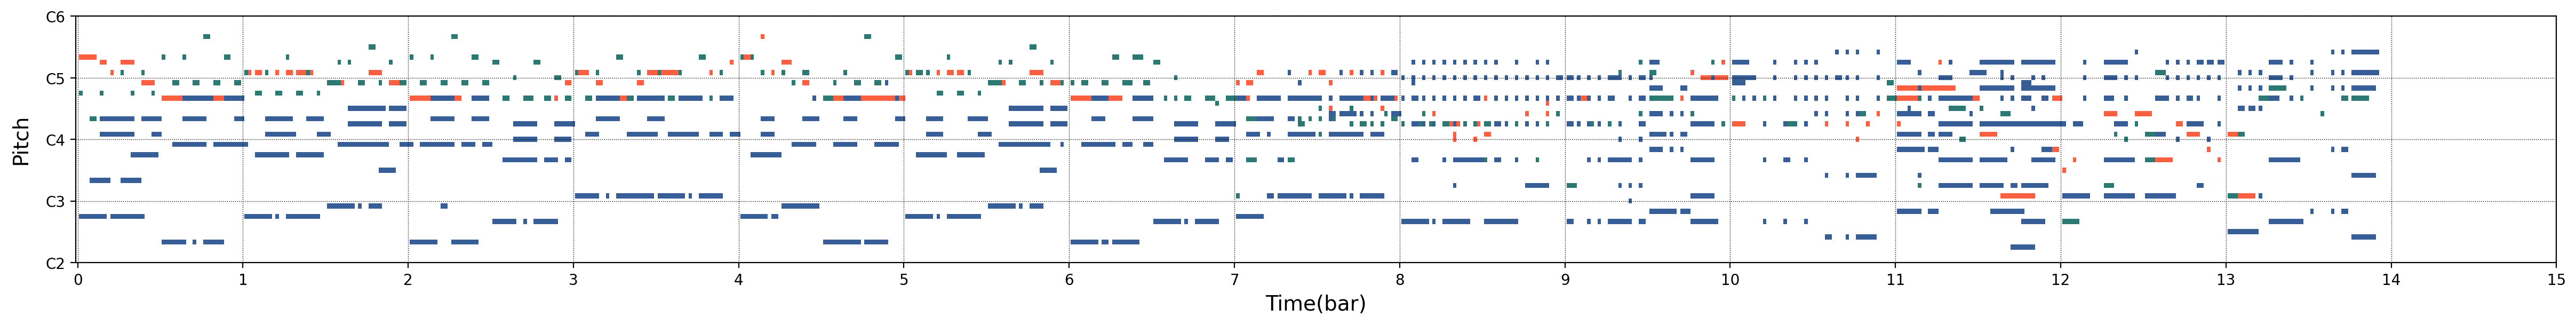

In [18]:
fig, ax = plt.subplots(figsize=(30, 3))


img = ax.imshow(
    all_transposed,
    aspect="auto",
    interpolation="none",
)

ax.set_ylim(36, 84)
ax.set_yticks([36, 48, 60, 72, 84])
ax.set_yticklabels(['C2', 'C3', 'C4', 'C5', 'C6'])
ax.set_ylabel("Pitch", rotation=90, labelpad=10, fontsize=14)

ax.set_xticks(np.arange(0, 721, 48))
ax.set_xticklabels(np.arange(0, 721, 48) // 48)
ax.set_xlabel("Time(bar)", fontsize=14)

# plt.title(f"event-based {method}", fontsize=16)

ax.grid(
    axis="both",
    color="k",
    linestyle=":",
    linewidth=0.5,
)